In [1]:
import tabula
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# pdf file with all data to make the analysis:
pdf_name = 'SuplementoEstadistico2021.pdf'

In [2]:
#-----------------------Useful functions-----------------------#

# To read data in pdf file:
def read_pdf(pdf_name, pags):
    df = tabula.read_pdf(
        pdf_name,
        pages=pags,
        stream=True,
        lattice=True,
        pandas_options={'header': [0]},
        multiple_tables=True)
    return df

#-----------------------Prepare data-----------------------#

In [3]:
#+++++++++++++++++++++++ Academic Degree for Prof +++++++++++++++++++++++#

Dat0 = read_pdf(pdf_name, '7-8') # Years 2010, 2015 and 2021-I. Table is in pages 7 and 8.

Esc_Prof = pd.concat([Dat0[1], Dat0[2]], ignore_index=True) # Number of Prof. with Doc., Mas., and Preg. per depto.

Esc_Prof.drop(Esc_Prof.index[0:2], inplace=True) # Rows 0 and 1 aren't useful.
Carreras_Prof = Esc_Prof[0] # Carreras Ofertadas
Esc_Prof.drop(columns=[0, 5, 10], inplace=True, axis=1) # Columns 5 and 10 aren't useful.

Esc_Prof.columns = ['D_2010', 'M_2010', 'E/P_2010', 'Total_2010',
                    'D_2015', 'M_2015', 'E/P_2015', 'Total_2015',
                    'D_2021-1', 'M_2021-1', 'E/P_2021-1', 'Total_2021-1']

Esc_Prof.set_axis(Carreras_Prof, axis=0, inplace=True) # Rename index from 0 to len row data.
Esc_Prof.index.name = 'Facultad / Departamento'

# Change data from str to float:
for col in Esc_Prof.columns[1:]:
    Esc_Prof[col] = Esc_Prof[col].astype(float) # Converts strings to float to make possible calculations.

Esc_Prof = Esc_Prof.fillna(0) # Change all NaN elements to 0 value.
Esc_Prof.to_csv('T1_Sup_Est_2021-I.csv') # Save dataframe in a csv-file.
Esc_Prof

,D_2010,M_2010,E/P_2010,Total_2010,D_2015,M_2015,E/P_2015,Total_2015,D_2021-1,M_2021-1,E/P_2021-1,Total_2021-1
Facultad / Departamento,,,,,,,,,,,,
Administración,27,19.0,2.0,48.0,39.0,13.0,4.0,55.0,55.0,10.0,0.0,65.0
Arquitectura,2,15.0,7.0,23.0,12.0,11.0,3.0,26.0,10.0,16.0,1.0,27.0
Diseño,0,22.0,1.0,23.0,1.0,24.0,1.0,26.0,7.0,23.0,1.0,31.0
Decanatura Facultad,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
Arquitectura y Diseño,2,37.0,8.0,46.0,13.0,34.0,5.0,52.0,17.0,40.0,2.0,59.0
Arte,4,13.0,1.0,18.0,4.0,13.0,1.0,18.0,0.0,17.0,0.0,17.0
Historia del Arte,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,8.0
Humanidades y literatura,12,1.0,1.0,14.0,12.0,1.0,1.0,14.0,16.0,0.0,1.0,17.0
Música,1,12.0,5.0,18.0,4.0,9.0,4.0,17.0,8.0,11.0,2.0,21.0


In [4]:
#+++++++++++++++++++++++ Academic Degree for Prof +++++++++++++++++++++++#

Dat2020 = read_pdf("SuplementoEstadistico2020.pdf", '7-8') # Years 2010, 2015 and 2021-I. Table is in pages 7 and 8.

print(Dat2020[4])

df_1 = pd.concat([Dat2020[1], Dat2020[4]],axis=0, ignore_index=True)
df_2 = pd.concat([Dat2020[2], Dat2020[5]],axis=0, ignore_index=True)
df_3 = pd.concat([Dat2020[3], Dat2020[6]],axis=0, ignore_index=True)


Esc_Prof2020 = pd.concat([df_1, df_2, df_3],axis=1, ignore_index=True) # Number of Prof. with Doc., Mas., and Preg. per depto.

Esc_Prof2020.drop(Esc_Prof2020.index[0:2], inplace=True) # Rows 0 and 1 aren't useful.
Esc_Prof2020.drop(Esc_Prof2020.index[-1], inplace=True) # Rows 0 and 1 aren't useful.
Carreras_Prof2020 = Esc_Prof2020[0] # Carreras Ofertadas



Esc_Prof2020.drop(columns=[0], inplace=True, axis=1) # Columns 5 and 10 aren't useful.

Esc_Prof2020.columns = ['D_2009', 'M_2009', 'E/P_2009', 'Total_2009',
                    'D_2014', 'M_2014', 'E/P_2014', 'Total_2014',
                    'D_2020-1', 'M_2020-1', 'E/P_2020-1', 'Total_2020-1']

Esc_Prof2020.set_axis(Carreras_Prof2020, axis=0, inplace=True) # Rename index from 0 to len row data.
Esc_Prof2020.index.name = 'Facultad / Departamento'

# Change data from str to float:
for col in Esc_Prof2020.columns[1:]:
    Esc_Prof2020[col] = Esc_Prof2020[col].astype(float) # Converts strings to float to make possible calculations.


Esc_Prof2020 = Esc_Prof2020.fillna(0) # Change all NaN elements to 0 value.
Esc_Prof2020.to_csv('T1_Sup_Est_2020-I.csv') # Save dataframe in a csv-file.
Esc_Prof2020

                               0    1    2    3      4
0                 Ing. Biomédica  NaN  NaN  NaN    NaN
1         Ing. Civil y Ambiental    9   11    1   21.0
2   Ing. Eléctrica y Electrónica   13    2    2   17.0
3                Ing. Industrial   12   13  NaN   25.0
4                  Ing. Mecánica   14    3  NaN   17.0
5                   Ing. Química    7    7  NaN   14.0
6                  Ing. Sistemas   12    9    2   23.0
7            Decanatura Facultad    1    2  NaN    3.0
8                     Ingeniería   70   47    5  122.0
9                       Medicina    6    1    2    9.0
10                Otras unidades    1    2  NaN    3.0
11                Total Uniandes  309  207   44  559.0
12                    Porcentaje  55%  37%   8%    NaN


,D_2009,M_2009,E/P_2009,Total_2009,D_2014,M_2014,E/P_2014,Total_2014,D_2020-1,M_2020-1,E/P_2020-1,Total_2020-1
Facultad / Departamento,,,,,,,,,,,,
Administración,29,16.0,5.0,50.0,32.0,16.0,4.0,52.0,55.0,11.0,0.0,66.0
Arquitectura,1,16.0,6.0,23.0,12.0,11.0,4.0,26.0,10.0,14.0,2.0,26.0
Diseño,0,19.0,2.0,21.0,2.0,20.0,2.0,24.0,4.0,26.0,2.0,32.0
Decanatura Facultad,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
Arquitectura y Diseño,1,35.0,8.0,44.0,14.0,30.0,7.0,51.0,14.0,41.0,4.0,59.0
Artes,1,13.0,1.0,15.0,5.0,12.0,1.0,18.0,0.0,17.0,0.0,17.0
Historia del Arte,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,7.0
Humanidades y literatura,8,3.0,1.0,12.0,13.0,1.0,1.0,15.0,15.0,0.0,1.0,16.0
Música,1,12.0,5.0,18.0,4.0,9.0,3.0,16.0,8.0,10.0,2.0,20.0


In [5]:
#+++++++++++++++++++++++ Number of Students +++++++++++++++++++++++#

Dat1 = read_pdf(pdf_name, '16-17') # Years 2016 (I, II) to 2021-I. Table is in pages 16 and 17.

Dat1[1] = Dat1[1].drop(Dat1[1].index[0]) # Row 0 isn't useful.
Dat1[2] = Dat1[2].drop(Dat1[2].index[0]) # Row 0 isn't useful.

Num_Est = pd.concat([Dat1[1], Dat1[2]], ignore_index=True) # Number of Prof. with Doc., Mas., and Preg. per depto.

Carreras_Est = Num_Est[0] # Carreras Ofertadas
Num_Est.drop(columns=[0], inplace=True, axis=1) # Column 0 isn't useful.

Num_Est.columns = ['2016-1', '2016-2', '2017-1', '2017-2', '2018-1', '2018-2',
                   '2019-1', '2019-2', '2020-1', '2020-2', '2021-1']

Num_Est.set_axis(Carreras_Est, axis=0, inplace=True) # Rename index from 0 to len row data.
Num_Est.index.name = 'Facultad / Departamento'

# Change data from str to float:
for col in Num_Est.columns[1:]:
    Num_Est[col] = Num_Est[col].str.replace(',','') # The , makes problems to convert to float.
    Num_Est[col] = Num_Est[col].astype(float) # Converts strings to float to make possible calculations.

Num_Est = Num_Est.fillna(0) # Change all NaN elements to 0 value.
Num_Est.to_csv('T5_Sup_Est_2021-I.csv') # Save dataframe in a csv-file.
Num_Est

,2016-1,2016-2,2017-1,2017-2,2018-1,2018-2,2019-1,2019-2,2020-1,2020-2,2021-1
Facultad / Departamento,,,,,,,,,,,
Administración,"1,009",997.0,985.0,989.0,989.0,1019.0,1020.0,1037.0,1058.0,1159.0,1202.0
Contaduría internacional,29,48.0,60.0,85.0,88.0,100.0,104.0,107.0,110.0,97.0,93.0
Administración,"1,038",1045.0,1045.0,1074.0,1077.0,1119.0,1124.0,1144.0,1168.0,1256.0,1295.0
Arquitectura,717,731.0,732.0,724.0,715.0,681.0,718.0,720.0,723.0,691.0,722.0
Diseño,710,730.0,761.0,751.0,761.0,765.0,781.0,793.0,795.0,812.0,833.0
Arquitectura y Diseño,"1,427",1461.0,1493.0,1475.0,1476.0,1446.0,1499.0,1513.0,1518.0,1503.0,1555.0
Arte,278,290.0,298.0,291.0,280.0,267.0,230.0,241.0,221.0,203.0,204.0
Historia del Arte,52,65.0,78.0,77.0,81.0,72.0,72.0,64.0,56.0,63.0,58.0
Literatura,181,182.0,200.0,198.0,210.0,202.0,196.0,181.0,168.0,160.0,139.0


In [6]:
Facultades = ['Administración', 'Arquitectura y Diseño', 'Artes y Humanidades',
              'Ciencias', 'Ciencias Sociales', 'Derecho', 'Economía', 'Educación',
              'Escuela de Gobierno', 'Ingeniería', 'Medicina']

Departamentos = ['Administración', 'Arquitectura', 'Diseño', 'Arte', 'Historia del Arte',
               'Humanidades y literatura', 'Música', 'Ciencias Biológicas', 'Física',
               'Geociencias', 'Matemáticas', 'Química', 'Antropología', 'Ciencia Política', 'Filosofía',
               'Historia y Geografía*', 'Lenguas y Cultura', 'Psicología', 'Derecho', 'Economía',
               'Educación', 'Escuela de Gobierno', 'Ing. Biomédica', 'Ing. Civil y Ambiental',
               'Ing. Eléctrica y Electrónica', 'Ing. Industrial', 'Ing. Mecánica',
               'Ing. Química y Alimentos**', 'Ing. Sistemas', 'Medicina']

#Esc_Prof.index.is_unique # return False value
#Esc_Prof.index.duplicated() # Show the duplicate index in dataframe

Prof_per_Fac = Esc_Prof.loc[~Esc_Prof.index.duplicated(), :] # Erase duplicated index
Prof_per_Fac = Prof_per_Fac.filter(items=Facultades, axis=0) # Filter data per Faculty
Prof_per_Fac.index.name = 'Facultad' # Rename index name

Prof_per_Fac2020 = Esc_Prof2020.loc[~Esc_Prof2020.index.duplicated(), :] # Erase duplicated index
Prof_per_Fac2020 = Prof_per_Fac2020.filter(items=Facultades, axis=0) # Filter data per Faculty
Prof_per_Fac2020.index.name = 'Facultad' # Rename index name

#Prof_per_Dept = Esc_Prof.loc[~Esc_Prof.index.duplicated(), :] # Erase duplicated index
#Prof_per_Dept = Prof_per_Dept.filter(items=Departamentos, axis=0) # Filter data per Depto
#Prof_per_Dept.index.name = 'Departamento' # Rename index name

Fac_Data_2021p = pd.merge(Prof_per_Fac, Prof_per_Fac2020, left_index=True, right_index=True)
Fac_Data_2021 = pd.merge(Fac_Data_2021p, Num_Est, left_index=True, right_index=True)
Fac_Data_2021.set_axis(range(0, len(Fac_Data_2021)), axis=0, inplace=True) # Rename index from 0 to len row data
Fac_Data_2021.drop(Fac_Data_2021.index[0], inplace=True) # Row 0 isn't useful
Fac_Data_2021.set_axis(Facultades, axis=0, inplace=True) # Rename index from 0 to len row data.
Fac_Data_2021

,D_2010,M_2010,E/P_2010,Total_2010,D_2015,M_2015,E/P_2015,Total_2015,D_2021-1,M_2021-1,...,2016-2,2017-1,2017-2,2018-1,2018-2,2019-1,2019-2,2020-1,2020-2,2021-1
Administración,27,19.0,2.0,48.0,39.0,13.0,4.0,55.0,55.0,10.0,...,1045.0,1045.0,1074.0,1077.0,1119.0,1124.0,1144.0,1168.0,1256.0,1295.0
Arquitectura y Diseño,2,37.0,8.0,46.0,13.0,34.0,5.0,52.0,17.0,40.0,...,1461.0,1493.0,1475.0,1476.0,1446.0,1499.0,1513.0,1518.0,1503.0,1555.0
Artes y Humanidades,17,29.0,7.0,53.0,23.0,28.0,7.0,58.0,39.0,35.0,...,738.0,762.0,769.0,776.0,751.0,697.0,725.0,716.0,756.0,745.0
Ciencias,74,19.0,7.0,99.0,103.0,16.0,8.0,127.0,112.0,15.0,...,1041.0,1042.0,1048.0,1033.0,1010.0,1014.0,1021.0,1044.0,996.0,1047.0
Ciencias Sociales,67,17.0,2.0,86.0,82.0,15.0,1.0,97.0,91.0,19.0,...,1557.0,1578.0,1528.0,1498.0,1459.0,1367.0,1285.0,1204.0,1133.0,1126.0
Derecho,14,18.0,4.0,35.0,25.0,12.0,1.0,38.0,35.0,6.0,...,1040.0,1021.0,1003.0,1007.0,1013.0,1048.0,1086.0,1139.0,1216.0,1248.0
Economía,26,8.0,0.0,34.0,32.0,6.0,0.0,38.0,32.0,5.0,...,909.0,874.0,866.0,888.0,903.0,929.0,932.0,951.0,998.0,1029.0
Educación,7,5.0,0.0,12.0,12.0,4.0,0.0,16.0,17.0,0.0,...,10.0,19.0,17.0,18.0,19.0,22.0,27.0,30.0,39.0,40.0
Escuela de Gobierno,4,1.0,0.0,5.0,10.0,1.0,0.0,11.0,15.0,0.0,...,141.0,177.0,212.0,233.0,252.0,274.0,272.0,286.0,273.0,276.0
Ingeniería,73.0,50.0,6.0,128.0,94.0,35.0,3.0,132.0,114.0,32.0,...,5675.0,5701.0,5599.0,5540.0,5517.0,5505.0,5256.0,5242.0,5026.0,4896.0


In [7]:
Dat2020cat = read_pdf("SuplementoEstadistico2020.pdf", '14') # Years 2010, 2015 and 2021-I. Table is in pages 7 and 8.

#print(Dat2020cat[1][1])


Esc_Prof2020cat = pd.concat([Dat2020cat[1]],axis=1, ignore_index=True) # Number of Prof. with Doc., Mas., and Preg. per depto.

Esc_Prof2020cat.drop(Esc_Prof2020cat.index[0:1], inplace=True) # Rows 0 and 1 aren't useful.
Esc_Prof2020cat.drop(Esc_Prof2020cat.index[-1], inplace=True) # Rows 0 and 1 aren't useful.
Carreras_Prof2020cat = Esc_Prof2020cat[0] # Carreras Ofertadas



Esc_Prof2020cat.drop(columns=[0], inplace=True, axis=1) # Columns 5 and 10 aren't useful.

Esc_Prof2020cat.columns = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020-1"]

Esc_Prof2020cat.set_axis(Carreras_Prof2020cat, axis=0, inplace=True) # Rename index from 0 to len row data.
Esc_Prof2020cat.index.name = 'Facultad / Departamento'

# Change data from str to float:
for col in Esc_Prof2020cat.columns[1:]:
    Esc_Prof2020cat[col] = Esc_Prof2020cat[col].astype(float) # Converts strings to float to make possible calculations.


Esc_Prof2020cat = Esc_Prof2020cat.fillna(0) # Change all NaN elements to 0 value.
Esc_Prof2020cat.to_csv('T1_Sup_Est_2020-I_cat.csv') # Save dataframe in a csv-file.
Esc_Prof2020cat


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020-1
Facultad / Departamento,,,,,,,,,,,
Administración,34.0,36.0,50.0,72.0,54.0,65.0,67.0,61.0,70.0,79.0,86.0
Arquitectura,48.0,44.0,37.0,50.0,39.0,40.0,47.0,45.0,53.0,53.0,50.0
Diseño,51.0,44.0,41.0,43.0,41.0,40.0,46.0,50.0,47.0,48.0,45.0
Arquitectura y Diseño,99.0,88.0,78.0,93.0,80.0,80.0,93.0,95.0,100.0,101.0,95.0
Arte,50.0,54.0,50.0,48.0,54.0,53.0,46.0,36.0,37.0,39.0,39.0
Historia del arte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0
Humanidades y Literatura,9.0,8.0,8.0,12.0,13.0,8.0,8.0,13.0,12.0,15.0,15.0
Música,30.0,32.0,32.0,34.0,34.0,36.0,38.0,47.0,42.0,44.0,45.0
CEPER,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,5.0,1.0,7.0


In [8]:
Facultades = ['Administración', 'Arquitectura y Diseño', 'Artes y Humanidades',
              'Ciencias', 'Ciencias Sociales', 'Derecho', 'Economía', 'Educación',
              'Escuela de Gobierno', 'Ingeniería', 'Medicina']

Departamentos = ['Administración', 'Arquitectura', 'Diseño', 'Arte', 'Historia del Arte',
               'Humanidades y literatura', 'Música', 'Ciencias Biológicas', 'Física',
               'Geociencias', 'Matemáticas', 'Química', 'Antropología', 'Ciencia Política', 'Filosofía',
               'Historia y Geografía*', 'Lenguas y Cultura', 'Psicología', 'Derecho', 'Economía',
               'Educación', 'Escuela de Gobierno', 'Ing. Biomédica', 'Ing. Civil y Ambiental',
               'Ing. Eléctrica y Electrónica', 'Ing. Industrial', 'Ing. Mecánica',
               'Ing. Química y Alimentos**', 'Ing. Sistemas', 'Medicina']

#Esc_Prof.index.is_unique # return False value
#print(Esc_Prof.index.duplicated()) # Show the duplicate index in dataframe


Prof_per_Fac2020cat = Esc_Prof2020cat.loc[~Esc_Prof2020cat.index.duplicated(), :] # Erase duplicated index
Prof_per_Fac2020cat = Prof_per_Fac2020cat.filter(items=Facultades, axis=0) # Filter data per Faculty
Prof_per_Fac2020cat.index.name = 'Facultad' # Rename index name

#Prof_per_Dept = Esc_Prof.loc[~Esc_Prof.index.duplicated(), :] # Erase duplicated index
#Prof_per_Dept = Prof_per_Dept.filter(items=Departamentos, axis=0) # Filter data per Depto
#Prof_per_Dept.index.name = 'Departamento' # Rename index name

Prof_per_Fac2020cat.set_axis(range(0, len(Prof_per_Fac2020cat)), axis=0, inplace=True) # Rename index from 0 to len row data
Prof_per_Fac2020cat.set_axis(Facultades, axis=0, inplace=True) # Rename index from 0 to len row data.
Prof_per_Fac2020cat

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020-1
Administración,34.0,36.0,50.0,72.0,54.0,65.0,67.0,61.0,70.0,79.0,86.0
Arquitectura y Diseño,99.0,88.0,78.0,93.0,80.0,80.0,93.0,95.0,100.0,101.0,95.0
Artes y Humanidades,92.0,95.0,91.0,96.0,101.0,98.0,93.0,101.0,101.0,108.0,116.0
Ciencias,44.0,39.0,57.0,68.0,71.0,86.0,88.0,78.0,85.0,78.0,95.0
Ciencias Sociales,88.0,97.0,104.0,99.0,115.0,123.0,116.0,136.0,142.0,137.0,128.0
Derecho,52.0,62.0,74.0,65.0,80.0,80.0,84.0,84.0,99.0,105.0,99.0
Economía,111.0,82.0,85.0,69.0,65.0,55.0,63.0,56.0,57.0,72.0,89.0
Educación,2.0,1.0,0.0,0.0,2.0,11.0,7.0,2.0,1.0,0.0,0.0
Escuela de Gobierno,4.0,5.0,1.0,1.0,1.0,3.0,11.0,9.0,12.0,16.0,12.0
Ingeniería,55.0,62.0,62.0,56.0,58.0,79.0,94.0,100.0,88.0,92.0,96.0


In [9]:
Data = pd.concat([Fac_Data_2021[["D_2020-1", "M_2020-1", "E/P_2020-1", "2020-1"]], Prof_per_Fac2020cat["2020-1"]], axis=1, ignore_index=True)
#Data = pd.concat([Fac_Data_2021[["D_2020-1", "M_2020-1", "E/P_2020-1"]], Prof_per_Fac2020cat["2020-1"]], axis=1, ignore_index=True)
Data

,0,1,2,3,4
Administración,55.0,11.0,0.0,1168.0,86.0
Arquitectura y Diseño,14.0,41.0,4.0,1518.0,95.0
Artes y Humanidades,38.0,33.0,3.0,716.0,116.0
Ciencias,114.0,15.0,6.0,1044.0,95.0
Ciencias Sociales,91.0,22.0,1.0,1204.0,128.0
Derecho,34.0,7.0,0.0,1139.0,99.0
Economía,32.0,6.0,0.0,951.0,89.0
Educación,17.0,0.0,0.0,30.0,0.0
Escuela de Gobierno,14.0,0.0,1.0,286.0,12.0
Ingeniería,119.0,37.0,1.0,5242.0,96.0


In [14]:
import sklearn.tree

target = np.ones(len(Data))
ii = Data.loc[:,4] > np.mean(Data.loc[:,4])
target[ii] = 1
target[~ii] = 0
print(Data.to_numpy(), target)

"""
clf = sklearn.tree.DecisionTreeRegressor(max_depth=3, criterion="squared_error")
X = Data.to_numpy()[:,:4]
estudiantes_total = np.sum(X[:,3])
X[:,3] = X[:,3]/estudiantes_total
print(X)
#X = np.delete(X,7,0)
targets = Data.to_numpy()[:,4]
#targets = np.delete(targets, 7, 0)


clf.fit(X,targets)
plt.figure(figsize=(10,10))
_=sklearn.tree.plot_tree(clf)
plt.show()
"""

[[5.500e+01 1.100e+01 0.000e+00 1.168e+03 8.600e+01]
 [1.400e+01 4.100e+01 4.000e+00 1.518e+03 9.500e+01]
 [3.800e+01 3.300e+01 3.000e+00 7.160e+02 1.160e+02]
 [1.140e+02 1.500e+01 6.000e+00 1.044e+03 9.500e+01]
 [9.100e+01 2.200e+01 1.000e+00 1.204e+03 1.280e+02]
 [3.400e+01 7.000e+00 0.000e+00 1.139e+03 9.900e+01]
 [3.200e+01 6.000e+00 0.000e+00 9.510e+02 8.900e+01]
 [1.700e+01 0.000e+00 0.000e+00 3.000e+01 0.000e+00]
 [1.400e+01 0.000e+00 1.000e+00 2.860e+02 1.200e+01]
 [1.190e+02 3.700e+01 1.000e+00 5.242e+03 9.600e+01]
 [1.900e+01 2.000e+00 0.000e+00 7.900e+02 2.380e+02]] [0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.]


'\nclf = sklearn.tree.DecisionTreeRegressor(max_depth=3, criterion="squared_error")\nX = Data.to_numpy()[:,:4]\nestudiantes_total = np.sum(X[:,3])\nX[:,3] = X[:,3]/estudiantes_total\nprint(X)\n#X = np.delete(X,7,0)\ntargets = Data.to_numpy()[:,4]\n#targets = np.delete(targets, 7, 0)\n\n\nclf.fit(X,targets)\nplt.figure(figsize=(10,10))\n_=sklearn.tree.plot_tree(clf)\nplt.show()\n'

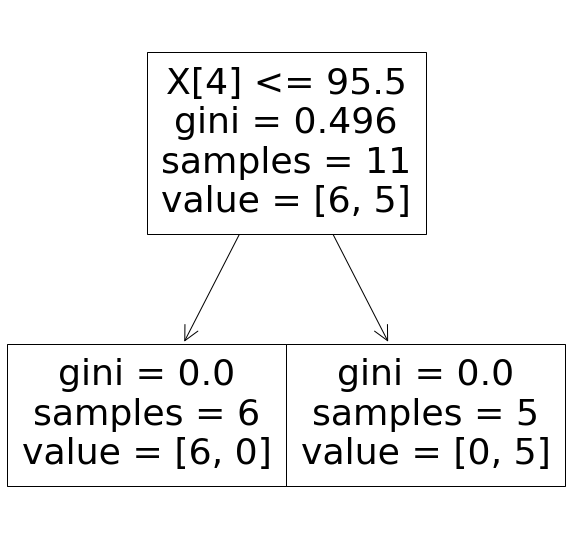

In [15]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth=1)

clf.fit(Data, target)

plt.figure(figsize=(10,10))
_= sklearn.tree.plot_tree(clf)

In [16]:
clf.feature_importances_

array([0., 0., 0., 0., 1.])